In [1]:
import numpy as np
import pandas as pd
import seaborn  
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
dataset.isnull().values.any()

False

In [6]:
dataset.duplicated().sum()

0

In [7]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
dataset['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

M    725
F    193
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

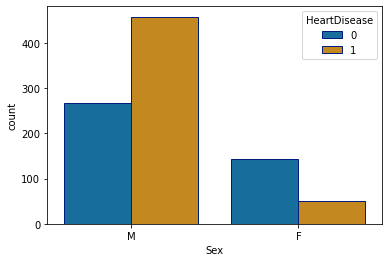

In [9]:
x = dataset['Sex'].value_counts()
print(x)
seaborn.countplot(x = 'Sex', hue = 'HeartDisease', data = dataset, palette = 'colorblind', edgecolor = seaborn.color_palette('dark', n_colors = 1))

In [10]:
lbl=LabelEncoder()
categorical=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'] #convert data to categorical data
for i in categorical:
  dataset[i]=lbl.fit_transform(dataset[i])


In [11]:
dataset.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [12]:
dataset.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64


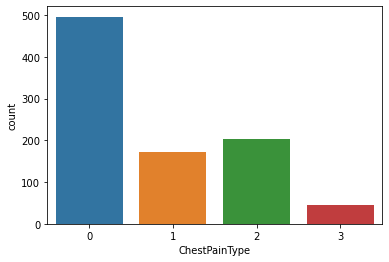

In [13]:
x = dataset['ChestPainType'].value_counts()
print(x)
seaborn.countplot(data = dataset, x = "ChestPainType")
plt.show()

In [14]:
corr = dataset.corr()

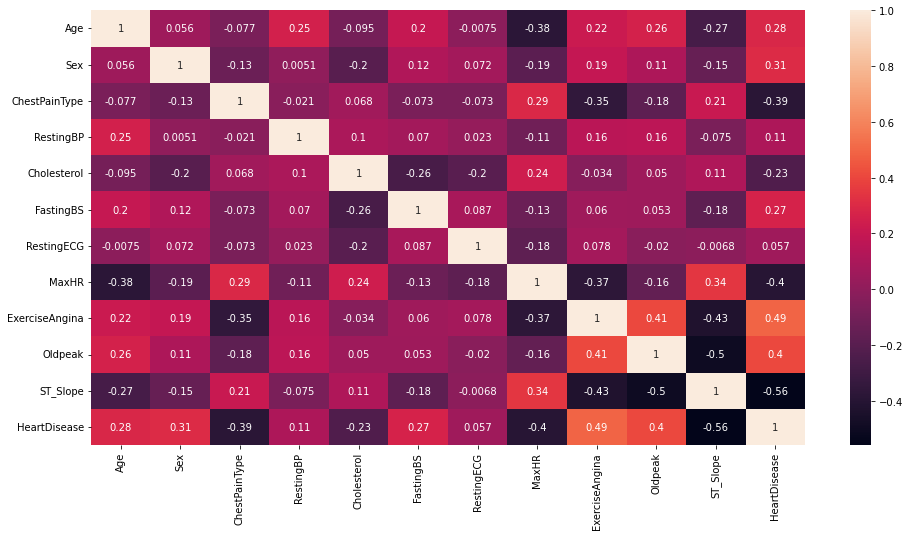

In [15]:
plt.figure(figsize=(16,8))
seaborn.heatmap(corr,annot=True)
plt.show()

0    704
1    214
Name: FastingBS, dtype: int64


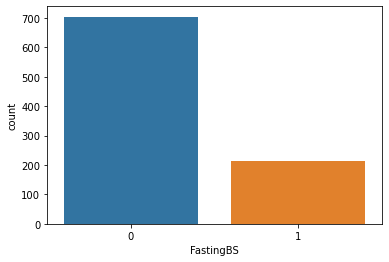

In [16]:
x = dataset['FastingBS'].value_counts()
print(x)
seaborn.countplot(data = dataset, x = "FastingBS")
plt.show()

1    508
0    410
Name: HeartDisease, dtype: int64


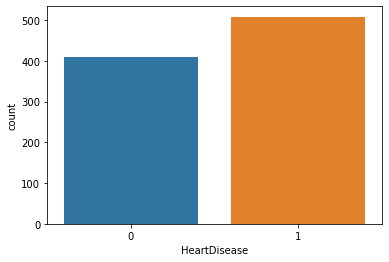

In [17]:
x = dataset['HeartDisease'].value_counts()
print(x)
seaborn.countplot(data = dataset, x = "HeartDisease")
plt.show()

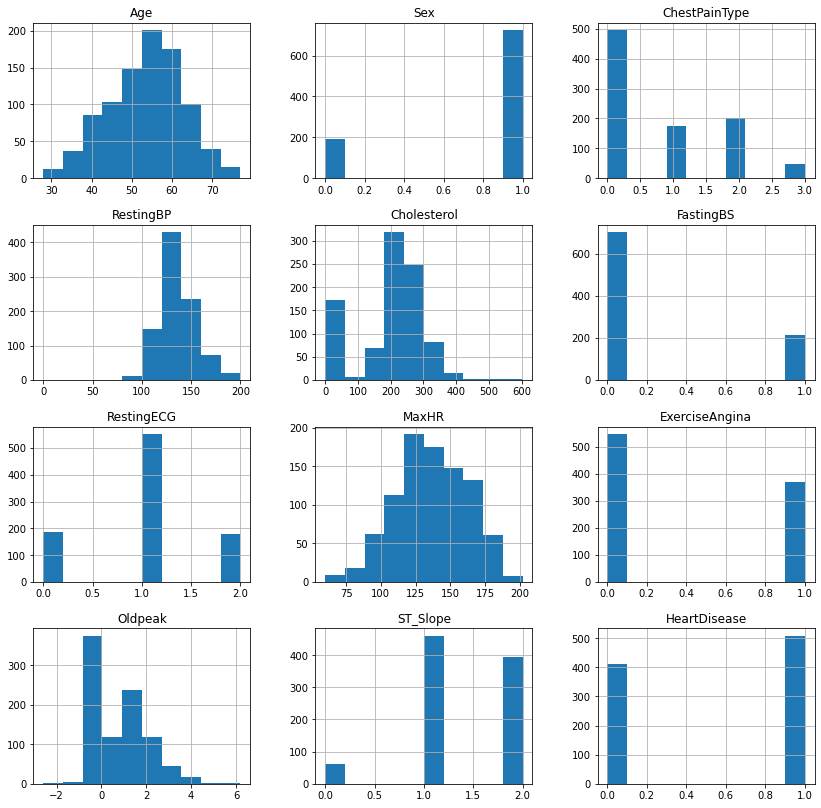

In [18]:
#distribution of data (histogram)
dataset.hist(figsize=(14, 14))
plt.show()

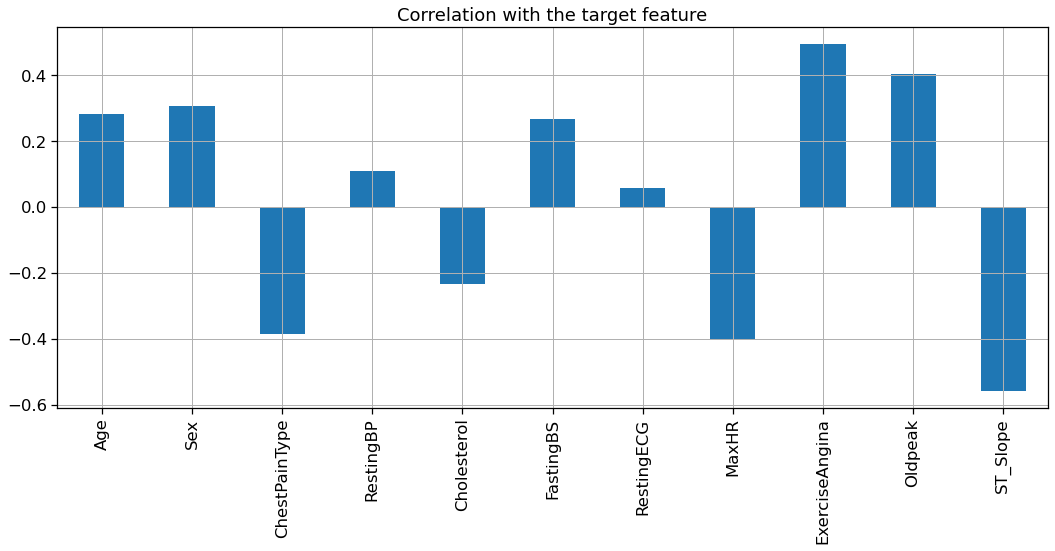

In [19]:
seaborn.set_context('notebook',font_scale = 1.5)
dataset.drop('HeartDisease', axis=1).corrwith(dataset.HeartDisease).plot(kind='bar', grid=True, figsize=(15,8),title="Correlation with the target feature")
plt.tight_layout()

In [20]:
#selecting new coloums and dataframe
myList =['Age','Sex','RestingBP', 'FastingBS','RestingECG', 'ExerciseAngina','Oldpeak']


#create a new dataframe with this list
New_dataset = dataset[myList]
print(New_dataset.shape)
New_dataset


(918, 7)


,Age,Sex,RestingBP,FastingBS,RestingECG,ExerciseAngina,Oldpeak
0,40,1,140,0,1,0,0.0
1,49,0,160,0,1,0,1.0
2,37,1,130,0,2,0,0.0
3,48,0,138,0,1,1,1.5
4,54,1,150,0,1,0,0.0
...,...,...,...,...,...,...,...
913,45,1,110,0,1,0,1.2
914,68,1,144,1,1,0,3.4
915,57,1,130,0,1,1,1.2
916,57,0,130,0,0,0,0.0


In [21]:
##Principle Component Analysis (PCA)

In [22]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

minScaler=StandardScaler()
minScaler.fit(dataset)
scaled_data=minScaler.transform(dataset)

In [23]:
scaled_data

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.83243239,
         1.05211381, -1.11311472],
       [-0.47848359, -1.93816322,  1.27505906, ...,  0.10566353,
        -0.59607813,  0.89837999],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.83243239,
         1.05211381, -1.11311472],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  0.29328271,
        -0.59607813,  0.89837999],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.83243239,
        -0.59607813,  0.89837999],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.83243239,
         1.05211381, -1.11311472]])

In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [25]:
x_pca=pca.transform(scaled_data)

In [26]:
scaled_data.shape

(918, 12)

In [27]:
x_pca.shape

(918, 2)

In [28]:
scaled_data

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.83243239,
         1.05211381, -1.11311472],
       [-0.47848359, -1.93816322,  1.27505906, ...,  0.10566353,
        -0.59607813,  0.89837999],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.83243239,
         1.05211381, -1.11311472],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  0.29328271,
        -0.59607813,  0.89837999],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.83243239,
        -0.59607813,  0.89837999],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.83243239,
         1.05211381, -1.11311472]])

Text(0, 0.5, 'Second principle component')

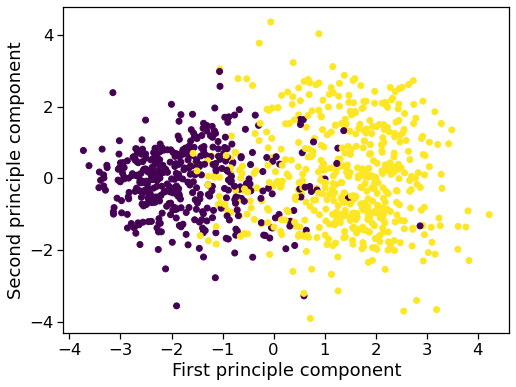

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=dataset['HeartDisease'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [30]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [31]:
y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_sample, y_sample = oversample.fit_resample(x, y)

In [33]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_sample)))

Original dataset shape Counter({1: 508, 0: 410})
Resampled dataset shape Counter({0: 508, 1: 508})


In [34]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [36]:
xtrain.shape

(734, 11)

In [37]:
xtest.shape

(184, 11)

In [38]:
ytest.shape

(184,)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [40]:
#classify function
def classify(model):
    model.fit(xtrain, ytrain)
    print("The accuracy of this model is: ", model.score(xtest, ytest)*100)
    predict = model.predict(xtest)
    print(classification_report(ytest, predict))

In [41]:
#classify function
def classify(model):
    model.fit(xtrain, ytrain)
    print("The accuracy of this model is: ", model.score(xtest, ytest)*100)
    predict = model.predict(xtest)
    print(classification_report(ytest, predict))

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
classify(clf)

The accuracy of this model is:  85.86956521739131
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        89
           1       0.86      0.87      0.86        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



Gradient Boosting Classifier Confusion Matrix


<AxesSubplot:>

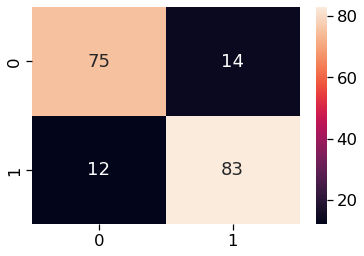

In [43]:
print('Gradient Boosting Classifier Confusion Matrix')
y_pred = clf.predict(xtest)

cm = confusion_matrix(ytest, y_pred)
seaborn.heatmap(cm,annot=True)

In [112]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=1000,criterion='gini', max_features='log2', bootstrap=False)
classify(rfcl)

The accuracy of this model is:  83.69565217391305
              precision    recall  f1-score   support

           0       0.87      0.78      0.82        89
           1       0.81      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



Random Forest Confusion Matrix


<AxesSubplot:>

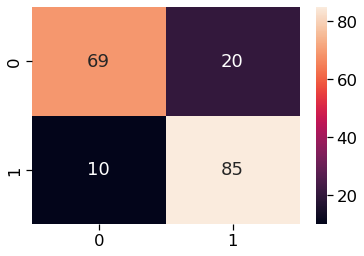

In [113]:
print('Random Forest Confusion Matrix')
y_pred = rfcl.predict(xtest)

cm = confusion_matrix(ytest, y_pred)
seaborn.heatmap(cm,annot=True)

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
bag_dt = BaggingClassifier(base_estimator=dt, n_estimators=100, bootstrap=True)
classify(bag_dt)

The accuracy of this model is:  84.78260869565217
              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



Decision Tree Confusion Matrix


<AxesSubplot:>

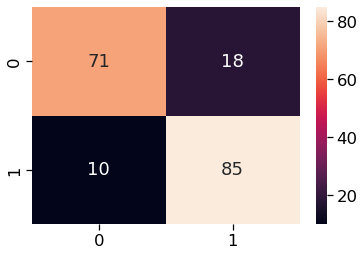

In [47]:
print('Decision Tree Confusion Matrix')
y_pred = bag_dt.predict(xtest)

cm = confusion_matrix(ytest, y_pred)
seaborn.heatmap(cm, annot=True)

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000, penalty='none')
lr.fit(xtrain, ytrain)
classify(lr)

The accuracy of this model is:  84.23913043478261
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        89
           1       0.83      0.87      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



Logistic Regression Confusion Matrix


<AxesSubplot:>

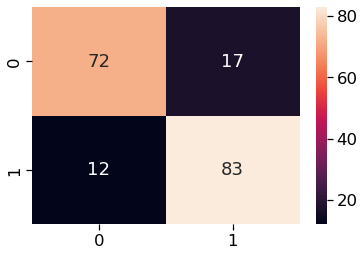

In [49]:
print('Logistic Regression Confusion Matrix')
y_pred = lr.predict(xtest)

cm = confusion_matrix(ytest, y_pred)
seaborn.heatmap(cm, annot=True)

In [50]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain, ytrain)
classify(nb)

The accuracy of this model is:  85.32608695652173
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        89
           1       0.84      0.88      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



Naive Bayes Confusion Matrix


<AxesSubplot:>

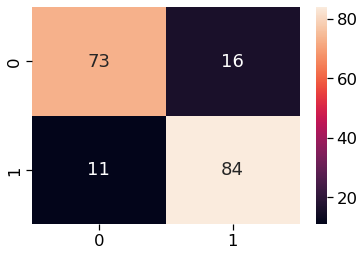

In [51]:
print('Naive Bayes Confusion Matrix')
y_pred = nb.predict(xtest)

cm = confusion_matrix(ytest, y_pred)
seaborn.heatmap(cm, annot=True)

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
classify(ada)

The accuracy of this model is:  86.41304347826086
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        89
           1       0.87      0.86      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



Adaboost Confusion Matrix


<AxesSubplot:>

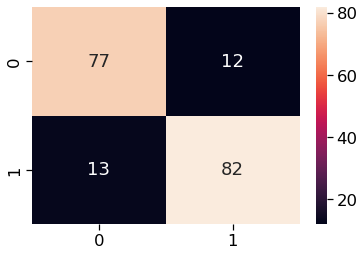

In [53]:
print('Adaboost Confusion Matrix')
y_pred = ada.predict(xtest)

cm = confusion_matrix(ytest, y_pred)
seaborn.heatmap(cm, annot=True)

In [54]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
classify(xgb)

The accuracy of this model is:  84.23913043478261
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        89
           1       0.83      0.87      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



XGB Boost Confusion Matrix


<AxesSubplot:>

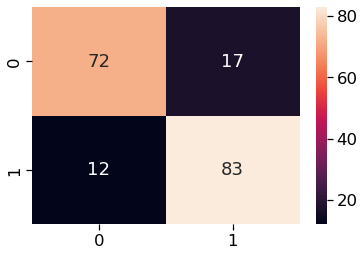

In [55]:
print('XGB Boost Confusion Matrix')
y_pred = xgb.predict(xtest)

cm = confusion_matrix(ytest, y_pred)
seaborn.heatmap(cm, annot=True)

In [63]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(xtrain, ytrain)
predict = lgbm.predict(xtest)
print(classification_report(ytest, predict))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        89
           1       0.85      0.93      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [82]:
#R-square Score
#from sklearn.metrics import r2_score
 
#r2_score(ytest, predict)

LGBM Confusion Matrix


<AxesSubplot:>

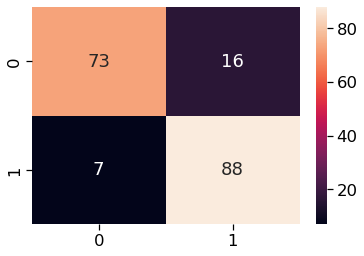

In [83]:
print('LGBM Confusion Matrix')
y_pred = lgbm.predict(xtest)

cm = confusion_matrix(ytest, y_pred)
seaborn.heatmap(cm, annot=True)

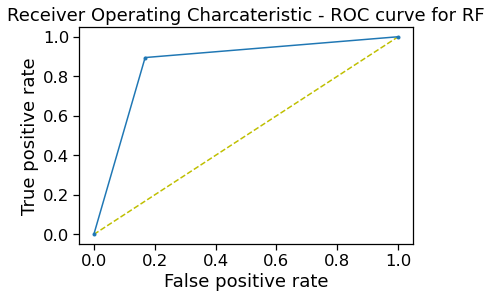

In [57]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
#random forest
y_preds = rfcl.predict(xtest).ravel()

rfcl_fpr, rfcl_tpr, thresholds = roc_curve(ytest, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(rfcl_fpr, rfcl_tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Charcateristic - ROC curve for RF')
plt.show()


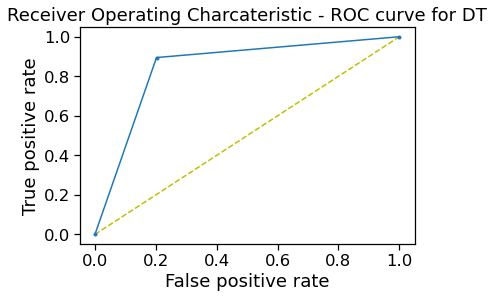

In [58]:
y_preds = bag_dt.predict(xtest).ravel()

dt_fpr, dt_tpr, thresholds = roc_curve(ytest, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(dt_fpr, dt_tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Charcateristic - ROC curve for DT')
plt.show()

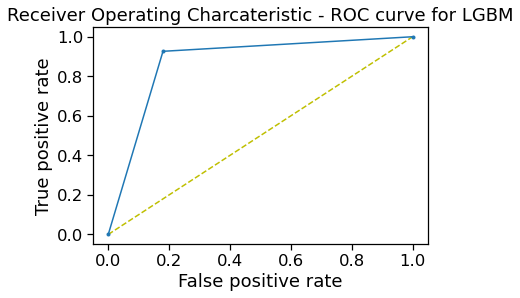

In [59]:
y_preds = lgbm.predict(xtest).ravel()

lgbm_fpr, lgbm_tpr, thresholds = roc_curve(ytest, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(lgbm_fpr, lgbm_tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Charcateristic - ROC curve for LGBM')
plt.show()

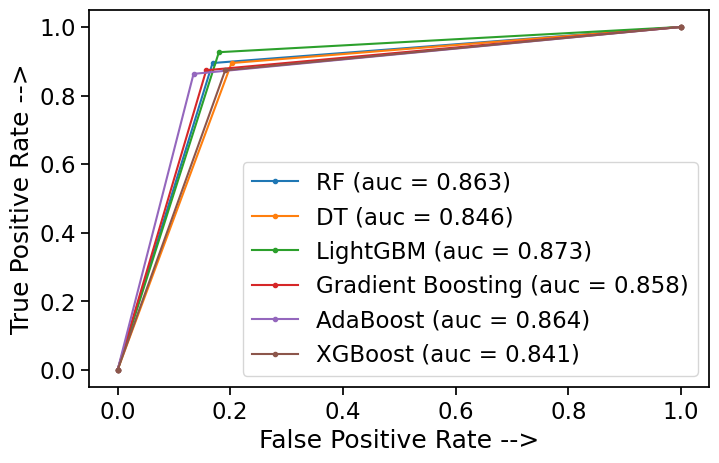

In [101]:
#random forest
y_pred_rfcl = rfcl.predict(xtest).ravel()
rfcl_fpr, rfcl_tpr, threshold = roc_curve(ytest, y_pred_rfcl)
auc_rfcl = auc(rfcl_fpr, rfcl_tpr)
#decision tree
y_pred_dt = bag_dt.predict(xtest).ravel()
dt_fpr, dt_tpr, threshold = roc_curve(ytest, y_pred_dt)
auc_dt = auc(dt_fpr, dt_tpr)
#lightgbm
y_pred_lgbm = lgbm.predict(xtest).ravel()
lgbm_fpr, lgbm_tpr, threshold = roc_curve(ytest, y_pred_lgbm)
auc_lgbm = auc(lgbm_fpr, lgbm_tpr)
#adaboost
y_pred_ada = ada.predict(xtest).ravel()
ada_fpr, ada_tpr, threshold = roc_curve(ytest, y_pred_ada)
auc_ada = auc(ada_fpr, ada_tpr)
#xgboost
y_pred_xgb = xgb.predict(xtest).ravel()
xgb_fpr, xgb_tpr, threshold = roc_curve(ytest, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)
#gradient boosting
y_pred_clf = clf.predict(xtest).ravel()
clf_fpr, clf_tpr, threshold = roc_curve(ytest, y_pred_clf)
auc_clf = auc(clf_fpr, clf_tpr)

plt.figure(figsize=(8, 5), dpi=100)
plt.plot(rfcl_fpr, rfcl_tpr, marker='.', label='RF (auc = %0.3f)' % auc_rfcl)
plt.plot(dt_fpr, dt_tpr, marker='.', label='DT (auc = %0.3f)' % auc_dt)
plt.plot(lgbm_fpr, lgbm_tpr, marker='.', label='LightGBM (auc = %0.3f)' % auc_lgbm)
plt.plot(clf_fpr, clf_tpr, marker='.', label='Gradient Boosting (auc = %0.3f)' % auc_clf)
plt.plot(ada_fpr, ada_tpr, marker='.', label='AdaBoost (auc = %0.3f)' % auc_ada)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost (auc = %0.3f)' % auc_xgb)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [102]:
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=12, activation='relu', input_shape=xtrain[0].shape))

ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [103]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [104]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [109]:
ann.fit(xtrain, ytrain, batch_size = 32, epochs = 500)

Epoch 1/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1669 - accuracy: 0.9346
Epoch 2/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1656 - accuracy: 0.9360
Epoch 3/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1657 - accuracy: 0.9373
Epoch 4/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1653 - accuracy: 0.9360
Epoch 5/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.9360
Epoch 6/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1643 - accuracy: 0.9401
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1643 - accuracy: 0.9387
Epoch 8/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1637 - accuracy: 0.9360
Epoch 9/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1631 - accuracy: 0.9387
Epoch 10/500
23/23 [==============================] - 0s 3ms/step - loss: 0.1633 - accuracy: 0.9401
Epoch 11/

In [107]:
pred = ann.predict(xtest)

ann_pred = []
for i in pred:
  if i > 0.5:
    ann_pred.append(1)
  else:
    ann_pred.append(0)

6/6 [==============================] - 0s 4ms/step


In [108]:
print( classification_report(ytest, ann_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        89
           1       0.80      0.89      0.85        95

    accuracy                           0.83       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.83      0.83       184



In [85]:
#For RF R-Square 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(xtrain, ytrain)

preds = rf_model.predict(xtest)

print('Random Forest: ', r2_score(ytest, preds))

Random Forest:  0.5355822590183323


In [110]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)

preds = dt.predict(xtrain)

r2_score(ytrain, preds)

1.0

In [111]:
#R-square Score
from sklearn.metrics import r2_score
 
r2_score(ytest, y_pred)

0.4994677705499705